## Feature Engineering (Continued)

### Imports for preprocessing & modelling:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                     cross_val_predict,
                                     KFold)

from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures,
                                   OneHotEncoder)

from sklearn.metrics import (mean_squared_error, 
                             r2_score)

from sklearn.linear_model import (LinearRegression,
                                  Ridge, 
                                  RidgeCV, 
                                  Lasso, 
                                  LassoCV,
                                  ElasticNet)

In [2]:
#importing the cleaned train df
df = pd.read_csv('./datasets/train_cleaned.csv')

In [3]:
df.drop(columns= 'Unnamed: 0', inplace=True)

In [4]:
df

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,lot_config,land_slope,neighborhood,...,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,sale_type,saleprice
0,109,533352170,bin_03,0.0,13517,3,4,CulDSac,3,Sawyer,...,3.0,3.0,2,0.0,44.0,0.0,0.0,3,WD,130500
1,544,531379050,bin_03,43.0,11492,3,4,CulDSac,3,SawyerW,...,3.0,3.0,2,0.0,74.0,0.0,0.0,4,WD,220000
2,153,535304180,bin_01,68.0,7922,4,4,Inside,3,NAmes,...,3.0,3.0,2,0.0,52.0,0.0,0.0,1,WD,109000
3,318,916386060,bin_03,73.0,9802,4,4,Inside,3,Timber,...,3.0,3.0,2,100.0,0.0,0.0,0.0,4,WD,174000
4,255,906425045,bin_06,82.0,14235,3,4,Inside,3,SawyerW,...,3.0,3.0,0,0.0,59.0,0.0,0.0,3,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,1587,921126030,bin_01,79.0,11449,3,4,Inside,3,Timber,...,3.0,3.0,2,0.0,276.0,0.0,0.0,1,WD,298751
2043,785,905377130,bin_02,0.0,12342,3,4,Inside,3,Edwards,...,3.0,3.0,2,158.0,0.0,0.0,0.0,3,WD,82500
2044,916,909253010,bin_06,57.0,7558,4,4,Inside,3,Crawfor,...,2.0,2.0,2,0.0,0.0,0.0,0.0,3,WD,177000
2045,639,535179160,bin_01,80.0,10400,4,4,Corner,3,NAmes,...,3.0,3.0,2,0.0,189.0,140.0,0.0,11,WD,144000


### **ONE HOT ENCODING, Identify X & Y, TRAIN/TEST/SPLIT**

In [5]:
#columns that should be one hot encoded:
columns_OHE = ['ms_subclass','lot_config','neighborhood','house_style',
               'mas_vnr_type','foundation','garage_type','sale_type']

In [6]:
count = 0
for l in columns_OHE:
    count+=len(set(df[l].values))
count

78

In [7]:
encode_cols = OneHotEncoder(handle_unknown = 'ignore')

X_pre = df[columns_OHE]
encode_cols.fit(X_pre)
X = encode_cols.transform(X_pre).toarray()

# one_hot = pd.DataFrame(X)
one_hot = pd.DataFrame(X,columns = 
                       encode_cols.get_feature_names(columns_OHE))

df = pd.concat([df,one_hot],axis=1)

In [8]:
#CHECKING IF ONE HOT CODED CORRECTLY:
filter_col = [col for col in df if str(col).startswith('ms_subclass')]
df[filter_col]

,ms_subclass,ms_subclass_bin_01,ms_subclass_bin_02,ms_subclass_bin_03,ms_subclass_bin_04,ms_subclass_bin_05,ms_subclass_bin_06,ms_subclass_bin_07,ms_subclass_bin_08,ms_subclass_bin_09,ms_subclass_bin_10
0,bin_03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,bin_03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bin_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bin_03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,bin_06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2042,bin_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2043,bin_02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2044,bin_06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2045,bin_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELLING ##

In [9]:
#selecting all numeric values as features, with the exception of SalePrice
features = [col for col in df._get_numeric_data().columns if col !='saleprice']

X = df[features]
y = df['saleprice']

In [10]:
diff = list(set(df.columns) -set(features))

In [11]:
X

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,0.0,13517,3,4,3,6,8,1976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,544,531379050,43.0,11492,3,4,3,7,5,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,153,535304180,68.0,7922,4,4,3,5,7,1953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,318,916386060,73.0,9802,4,4,3,5,5,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,255,906425045,82.0,14235,3,4,3,6,8,1900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,1587,921126030,79.0,11449,3,4,3,8,5,2007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2043,785,905377130,0.0,12342,3,4,3,4,5,1940,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2044,916,909253010,57.0,7558,4,4,3,6,6,1928,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2045,639,535179160,80.0,10400,4,4,3,4,5,1956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
#train/test/split with training size 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [13]:
#showing the distributions of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1637, 125)
(410, 125)
(1637,)
(410,)


### **LINEAR REGRESSION**

In [14]:
#instantiate
lm = LinearRegression()

#10 fold cross val score on TRAIN
lm_cv_mse = -cross_val_score(lm, 
                             X_train, 
                             y_train, 
                             cv=5,
                             scoring='neg_root_mean_squared_error').mean()


In [15]:
#root MSE
lm_cv_mse

24574.325914609846

In [16]:
#fitting our model on training set:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
#SHOWING MEAN prediction for our test set
y_preds_lm = lm.predict(X_test).mean()


Our baseline score for the mean is 24616.

In [18]:
print('Linear Model CV Score (train):',lm_cv_mse)
print("Linear Model y_preds mean:",y_preds_lm.mean())

Linear Model CV Score (train): 24574.325914609846
Linear Model y_preds mean: 182680.62100087974


### LINEAR REGRESSION - 

The top two neighborhoods(GrnHill, StoneBr) were extremely overblown.
For GrnHill, this is interoreted as a price increase of $108,880 per unit increase (of a house purchased) in neighborhood_GrnHill.

Other coefficient types also had very large unit increments.

In [19]:
lm_coeffs = dict(zip(X_train.columns, lm.coef_))
dff = abs(pd.DataFrame(lm_coeffs, index=[0]).T)
dff.columns = ['value']
dff.sort_values(by=['value'], ascending=False).describe()
dff.sort_values(by=['value'], ascending=False).head(10)

,value
neighborhood_GrnHill,106885.550053
neighborhood_StoneBr,38152.917937
house_style_1.5Unf,24742.615760
ms_subclass_bin_10,23890.818350
neighborhood_NridgHt,20879.510658
sale_type_COD,17882.092969
kitchen_abvgr,17519.029536
neighborhood_CollgCr,17176.477307
neighborhood_Veenker,16857.089961
utilities,16773.271750


### **RIDGE REGRESSION -**

In [20]:
#Scaling data
ss=StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [21]:
#Instantiate ridge model:
r_alphas = np.logspace(0,5,200)
ridge_cv = RidgeCV(alphas=r_alphas, store_cv_values = True)

#Fit ridgeCV model on scaled training set:
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        store_cv_values=True)

In [22]:
#obtain optimal alpha from ridgeCV
r_optimal_alpha = ridge_cv.alpha_
print(r_optimal_alpha)

#use optimal alpha to run ridge:
ridge_opt = Ridge(alpha=r_optimal_alpha)


13.509935211980272


In [23]:
ridge_opt.fit(X_train_scaled, y_train)

Ridge(alpha=13.509935211980272)

In [24]:
ridge_opt

Ridge(alpha=13.509935211980272)

In [25]:
#rmse on train set
ridge_cv_RMSE = - cross_val_score(ridge_cv, 
                                X_train_scaled, 
                                y_train,
                                scoring='neg_root_mean_squared_error').mean()
ridge_cv_RMSE

24600.65450017758

In [26]:
#rmse on optimal alpha
ridge_opt_RMSE = - cross_val_score(ridge_opt, 
                                X_train_scaled, 
                                y_train,
                                scoring='neg_root_mean_squared_error').mean()
ridge_opt_RMSE

24560.480642002796

### **LASSO REGRESSION**

In [27]:
#instantiate:
lasso_cv = LassoCV(n_alphas=100)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV()

In [28]:
X_train_scaled.shape

(1637, 125)

In [29]:
#finding optimal alpha
l_optimal_alpha = lasso_cv.alpha_

#instantiate with optimal alpha
lasso_model=Lasso(alpha=l_optimal_alpha)

#fitting lasso with optimal alpha
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=267.34726623154376)

In [30]:
#cross validating alpha score
lasso_cv_RMSE = -cross_val_score(lasso_cv,
                                 X_train_scaled,
                                 y_train,
                                 cv=10,
                                 scoring='neg_root_mean_squared_error'
                                ).mean()

In [31]:
lasso_cv_RMSE

23975.16863220038

In [32]:
#generating mean of predictions
lasso_cv.predict(X_train_scaled).mean()

180823.44532681734

In [33]:
lasso_model_RMSE = -cross_val_score(lasso_model,
                                    X_train_scaled,
                                    y_train,
                                    cv=10,
                                    scoring='neg_root_mean_squared_error'
                                   ).mean()

In [34]:
#score for lasso model
lasso_model_RMSE

23935.659844768266

As we can see from scores below, the Lasso Models perform marginally better than the Ridge models - we will use Lasso to tune our parameters.

In [35]:
print("Ridge CV RMSE:",ridge_cv_RMSE)
print("Ridge Model RMSE:",ridge_opt_RMSE,"\n")
print("Lasso CV RMSE:",lasso_cv_RMSE)
print("Lasso Model RMSE:",lasso_model_RMSE)

Ridge CV RMSE: 24600.65450017758
Ridge Model RMSE: 24560.480642002796 

Lasso CV RMSE: 23975.16863220038
Lasso Model RMSE: 23935.659844768266


### GENERATING PREDICTIONS ON LASSO MODEL

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-36-aabcd1840cfa>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45, size=15)
/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-36-aabcd1840cfa>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1

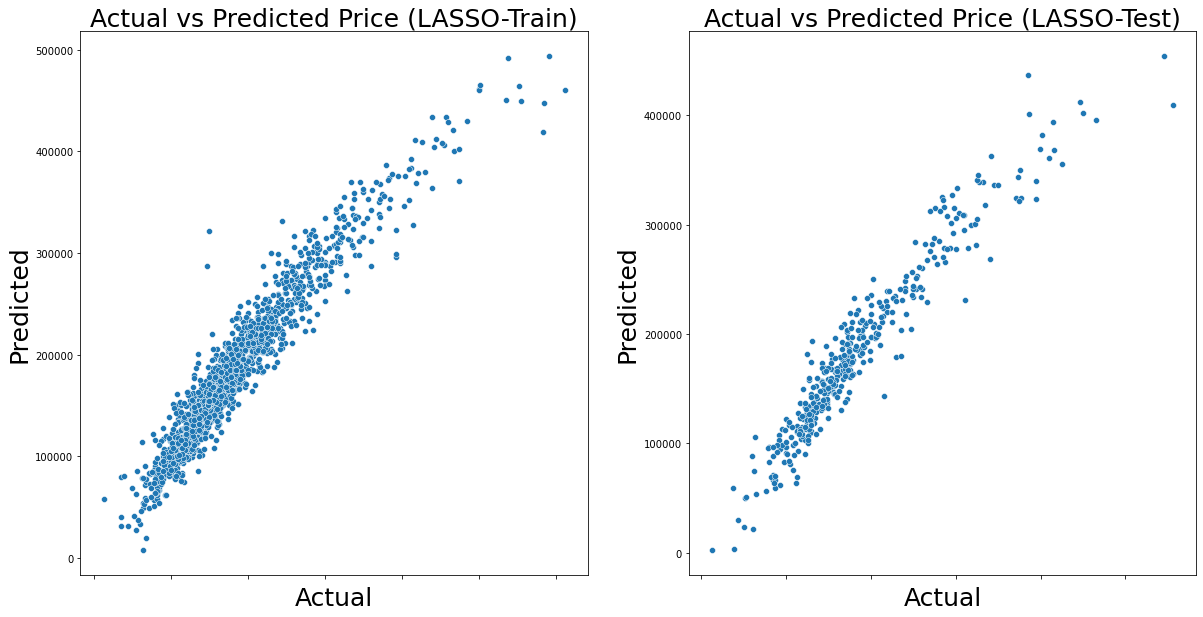

In [36]:
y_lasso_cv_train = lasso_cv.predict(X_train_scaled)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax=ax.ravel()
sns.scatterplot(
            y_train,
            y_lasso_cv_train,
            ax=ax[0]
        );
        #rotation necessary especially for features with many categories
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45, size=15)
ax[0].set_xlabel('Actual', fontsize = 25)
ax[0].set_ylabel('Predicted', fontsize = 25)
ax[0].set_title("Actual vs Predicted Price (LASSO-Train)", fontsize=25);

y_lasso_cv_test = lasso_cv.predict(X_test_scaled)
sns.scatterplot(
            y_test,
            y_lasso_cv_test,
            ax=ax[1]
        );
        #rotation necessary especially for features with many categories
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45, size=15)
ax[1].set_xlabel('Actual', fontsize = 25)
ax[1].set_ylabel('Predicted', fontsize = 25)
ax[1].set_title("Actual vs Predicted Price (LASSO-Test)",fontsize=25);

As we can see from the actual vs prediction plots above, our model performs well on both the train and test sets. Scatter points are clustered together and follow the same trend.

### **List of coefficients (Lasso)**

In [37]:
#creating a dataframe of features & their coefficients
coef_df = pd.DataFrame({'feature':X_train.columns, 'coeff':lasso_model.coef_})
coef_df

,feature,coeff
0,id,0.000000
1,pid,0.000000
2,lot_frontage,1801.338421
3,lot_area,5655.945649
4,lot_shape,0.000000
...,...,...
120,sale_type_ConLI,0.000000
121,sale_type_ConLw,-0.000000
122,sale_type_New,2990.260046
123,sale_type_Oth,553.665716


### Tuning Hyperparameters/Removing features with coefficients 0

In [38]:
#assigns all nonzero coefficients to relevant_features (using above
#coefficient dataframe, and then applying to X_train_reduced
relevant_features = coef_df[abs(coef_df['coeff']) > 0]['feature']
X_train_reduced = X_train[relevant_features]
X_train_reduced_scaled = ss.fit_transform(X_train_reduced)


In [39]:
#instantiating again for adjusted model:
adj_lasso_model=LassoCV(n_alphas=100)

#fitting on adjusted model
adj_lasso_model.fit(X_train_reduced_scaled, y_train)


#RMSE on adjusted model
lasso_cv_RMSE = -cross_val_score(adj_lasso_model,
                                 X_train_reduced_scaled,
                                 y_train,
                                 scoring='neg_root_mean_squared_error'
                                ).mean()

print('Adjusted Lasso_CV RMSE:',lasso_cv_RMSE)

Adjusted Lasso_CV RMSE: 23937.23262311857


## Adjusting Rows & Columns of Test Set to Match Training Set ##

In [40]:
test = pd.read_csv('./datasets/test.csv')

In [41]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [42]:
test.shape

(879, 80)

In [43]:
#renaming all columns to lowercase/replacing spaces with '_' for consistency
test.columns = [x.lower().replace(' ','_') for x in test.columns]

In [44]:
test.replace(0,np.nan, inplace=True)

#dropping the same features as we did in train set:
test.drop(columns=['pool_qc','pool_area','3ssn_porch','low_qual_fin_sf','misc_val',
                    'misc_feature','bsmt_half_bath','alley','fence'], inplace=True)

In [45]:
test.replace(to_replace = {
    'lot_shape':{'Reg': 4,'IR1': 3,'IR2': 2,'IR3': 1},
    'utilities':{'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1},
    'land_slope':{'Gtl':3,'Mod':2,'Sev':1},
    'bsmt_cond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'NA': 0},
    'bsmt_exposure': {'Gd': 4, 'Av':3, 'Mn':2, 'No': 1, 'NA': 0},
    'bsmt_qual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'NA': 0},
    'exter_qual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'NA': 0},
    'exter_cond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'NA': 0},
    'heating_qc': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'NA': 0},
    'bsmtfin_type_1': {'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
    'bsmtfin_type_2': {'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
    'electrical':{'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},
    'kitchen_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'functional':{'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},
    'fireplace_qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
    'garage_finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0},
    'garage_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
    'garage_cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
    'paved_drive':{'Y':2,'P':1,'N':0}},
    inplace=True
    
    
)

In [46]:
test[(test['id'] == 1499)]
test[(test['id'] == 2181)]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,yr_sold,sale_type


In [47]:
test.replace(np.nan, 0, inplace=True)

In [48]:
test.shape

(879, 71)

In [49]:
test[(test['id'] == 2116)]
test[(test['id'] == 2072)]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,yr_sold,sale_type


In [50]:
test.replace(np.nan, 0, inplace=True)

In [51]:
test.isnull().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage      0
                 ..
enclosed_porch    0
screen_porch      0
mo_sold           0
yr_sold           0
sale_type         0
Length: 71, dtype: int64

In [52]:
test.drop(columns=['bldg_type','ms_zoning','street',
                   'land_contour', 'condition_1',
                   'condition_2', 'roof_style',
                   'roof_matl','exterior_1st',
                   'exterior_2nd','heating',
                   'central_air','2nd_flr_sf',
                   'total_bsmt_sf','garage_cars',
                   'yr_sold'],inplace=True)

In [53]:
test.shape

(879, 55)

In [54]:
#applying the regrouping of variables to the test set
group = {20:'bin_01',75:'bin_01',30:'bin_02',60:'bin_03', 
         70:'bin_04',80:'bin_05',85:'bin_05',50:'bin_06',
         90:'bin_06',120:'bin_07',190:'bin_08',40:'bin_08', 
         160:'bin_09',180:'bin_09',45:'bin_10',150:'bin_10'}

#assigning the regrouped bins & overwriting existing columns in the test set
test['ms_subclass'] = test.apply(lambda row: group[row['ms_subclass']] 
                                   if (row['ms_subclass'] in group) 
                                   else row['ms_subclass'], axis=1)
test['ms_subclass'].value_counts()


bin_01    316
bin_03    181
bin_06    123
bin_07     60
bin_05     52
bin_09     47
bin_04     38
bin_02     38
bin_08     17
bin_10      7
Name: ms_subclass, dtype: int64

In [55]:
test.shape


(879, 55)

In [56]:
#Applying OHE to the test set:
X_test_OHE = encode_cols.transform(test[columns_OHE]).toarray()
ohe = pd.DataFrame(X_test_OHE,columns = encode_cols.get_feature_names(columns_OHE))
X_test_adj = pd.concat([test,ohe],axis=1)


In [57]:
X_test.shape

(410, 125)

In [58]:
test_features = [col for col in X_test_adj._get_numeric_data().columns]
X_test_adj = X_test_adj[test_features]

In [59]:
X_test_adj

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,2658,902301120,69.0,9142,4,4,3,6,8,1910,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2718,905108090,0.0,9662,3,4,3,5,4,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2414,528218130,58.0,17104,3,4,3,7,5,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1989,902207150,60.0,8520,4,4,3,5,6,1923,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,625,535105100,0.0,9500,3,4,3,6,5,1963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,80.0,8000,4,4,3,6,6,1974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
875,1234,535126140,90.0,14670,4,4,3,6,7,1966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
876,1373,904100040,55.0,8250,4,4,3,5,5,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
877,1672,527425140,60.0,9000,4,4,3,4,6,1971,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
X_test_reduced = X_test_adj[relevant_features]
X_test_reduced_scaled = ss.transform(X_test_reduced)
X_test_reduced_scaled.mean()

-0.0011370598587097434

In [61]:
adj_lasso_model.predict(X_test_reduced_scaled).mean()

179540.13723329303

In [62]:
X_test_adj['SalePrice']=adj_lasso_model.predict(X_test_reduced_scaled)

In [63]:
X_test_adj

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,SalePrice
0,2658,902301120,69.0,9142,4,4,3,6,8,1910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,152901.627763
1,2718,905108090,0.0,9662,3,4,3,5,4,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,156897.978153
2,2414,528218130,58.0,17104,3,4,3,7,5,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,219396.477474
3,1989,902207150,60.0,8520,4,4,3,5,6,1923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,106104.781094
4,625,535105100,0.0,9500,3,4,3,6,5,1963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,175839.075668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,80.0,8000,4,4,3,6,6,1974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,186167.051321
875,1234,535126140,90.0,14670,4,4,3,6,7,1966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,229195.527683
876,1373,904100040,55.0,8250,4,4,3,5,5,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,127447.397670
877,1672,527425140,60.0,9000,4,4,3,4,6,1971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114003.422115


In [64]:
X_test_adj.to_csv('./datasets/test_first')

In [65]:
X_test_adj.drop(X_test.iloc[:, 1:132], inplace = True, axis = 1) 

In [66]:
X_test_adj.set_index('id',inplace=True)

In [67]:
X_test_adj.to_csv('./datasets/kaggletestFINAL')

### Evaluation

After modelling, the primary model used for prediction was the Lasso Model. Though the Root Mean-Squared-Errors (RMSEs) for both the Lasso and Ridge were close in magnitude, the Lasso model helped better with noise reduction by removing features that had coefficients of 0.

The Kaggle scoring on this model was almost 28,000. The metric used here was RMSE as well, meaning that this model can be improved significantly by further feature engineering/model optimization.

Many of the features provided in the project were largely intercorrelated, and not enough were independent.

In general, while the model made predictions within an acceptable range, further engineering can be done to reduce the errors made on predictions.

### Other plots - Residuals

The residual plots are plotted below for both Ridge and Lasso. We can see that both are of similar shapes, but the Lasso has less space between points. Based off of this, we can assume that the Lasso model is more fitted and has less variance.

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-68-c6cb91a9a1d6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45, size=15)
/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-68-c6cb91a9a1d6>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1

Text(0.5, 1.0, 'Residual of Lasso Test')

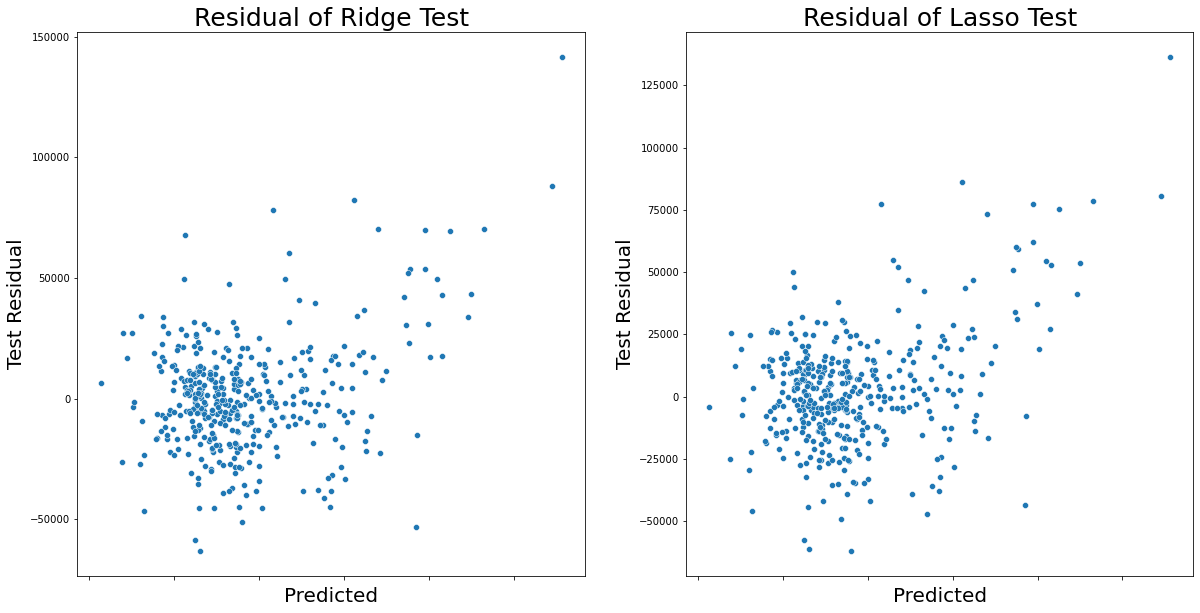

In [68]:
#Residuals for ridge(left) & lasso(right)

pred_ridge_test = ridge_opt.predict(X_test_scaled)

X_test_reduced = X_test[relevant_features]
X_test_reduced_scaled = ss.fit_transform(X_test_reduced)
pred_adj_lasso_test = adj_lasso_model.predict(X_test_reduced_scaled)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax=ax.ravel()
sns.scatterplot(
            y_test,
            y_test - pred_ridge_test,
            ax=ax[0]
        );
        #rotation necessary especially for features with many categories
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45, size=15)
ax[0].set_xlabel('Predicted', fontsize = 20)
ax[0].set_ylabel('Test Residual', fontsize = 20)
ax[0].set_title("Residual of Ridge Test", fontsize = 25)
y_lasso_cv_test = lasso_cv.predict(X_test_scaled)
sns.scatterplot(
            y_test,
            y_test - pred_adj_lasso_test,
            ax=ax[1]
        );
        #rotation necessary especially for features with many categories
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45, size=15)
ax[1].set_xlabel('Predicted', fontsize = 20)
ax[1].set_ylabel('Test Residual', fontsize = 20)
ax[1].set_title("Residual of Lasso Test", fontsize = 25)